# Dog 1

The training data is organized into ten minute EEG clips labeled "Preictal" for pre-seizure data segments, or "Interictal" for non-seizure data segments. Data segments are stored in .mat files as follows:

 - preictal_segment_N.mat - the Nth preictal training data segment
 - interictal_segment_N.mat - the Nth non-seizure training data segment

In [1]:
import os
rootdir = "../../../data.nosync/"
os.listdir(rootdir)[:10]

['Dog_1_interictal_segment_0085.mat',
 'Dog_1_interictal_segment_0091.mat',
 'Dog_1_interictal_segment_0046.mat',
 'Dog_1_interictal_segment_0052.mat',
 'Dog_1_interictal_segment_0287.mat',
 'Dog_1_interictal_segment_0293.mat',
 'Dog_1_interictal_segment_0278.mat',
 'Dog_1_interictal_segment_0244.mat',
 'Dog_1_interictal_segment_0250.mat',
 'Dog_1_preictal_segment_0023.mat']

Each .mat file contains a data structure with fields as follow:

- data: a matrix of EEG sample values arranged row x column as electrode x time.
- data_length_sec: the time duration of each data row
- sampling_frequency: the number of data samples representing 1 second of EEG data.
- channels: a list of electrode names corresponding to the rows in the data field
- sequence: the index of the data segment within the one hour series of clips. For example, preictal_segment_6.mat has a sequence number of 6, and represents the iEEG data from 50 to 60 minutes into the preictal data.

In [2]:
import scipy.io as sio
import parser as p
filename = "Dog_1_preictal_segment_0001.mat"
path = rootdir + filename
mat = sio.loadmat(path)

data = p.get_data(mat)
print('EEG data matrix dimension (electrode, time):', data.shape)

data_length_sec = p.get_data_length_sec(mat)
print('Time duration of each EEG data row (s):', data_length_sec)

sampling_frequency = p.get_sampling_frequency(mat)
print('Sampling frequency (number of data samples representing 1s of EEG data)', sampling_frequency)

channels = p.get_channels(mat)
print('List of electrode names:', channels)

sequence = p.get_sequence(mat)
print('Index of data segment in series of 10 min clips:', sequence)

EEG data matrix dimension (electrode, time): (16, 239766)
Time duration of each EEG data row (s): 600
Sampling frequency (number of data samples representing 1s of EEG data) 399.609756097561
List of electrode names: [array(['NVC1202_32_002_Ecog_c001'], dtype='<U24')
 array(['NVC1202_32_002_Ecog_c002'], dtype='<U24')
 array(['NVC1202_32_002_Ecog_c003'], dtype='<U24')
 array(['NVC1202_32_002_Ecog_c004'], dtype='<U24')
 array(['NVC1202_32_002_Ecog_c005'], dtype='<U24')
 array(['NVC1202_32_002_Ecog_c006'], dtype='<U24')
 array(['NVC1202_32_002_Ecog_c007'], dtype='<U24')
 array(['NVC1202_32_002_Ecog_c008'], dtype='<U24')
 array(['NVC1202_32_002_Ecog_c009'], dtype='<U24')
 array(['NVC1202_32_002_Ecog_c010'], dtype='<U24')
 array(['NVC1202_32_002_Ecog_c011'], dtype='<U24')
 array(['NVC1202_32_002_Ecog_c012'], dtype='<U24')
 array(['NVC1202_32_002_Ecog_c013'], dtype='<U24')
 array(['NVC1202_32_002_Ecog_c014'], dtype='<U24')
 array(['NVC1202_32_002_Ecog_c015'], dtype='<U24')
 array(['NVC1202_32

## Recording Length

In [3]:
def is_interictal(name):
    return 'interictal' in name

def get_interictal_file_count(directory_path):
    interictal_filter = filter(is_interictal, os.listdir(directory_path))
    interictals = [interictal for interictal in interictal_filter]
    return len(interictals)

def is_preictal(name):
    return 'preictal' in name

def get_preictal_file_count(directory_path):
    preictal_filter = filter(is_preictal, os.listdir(directory_path))
    preictals = [preictal for preictal in preictal_filter]
    return len(preictals)

print('Interictal file count:', get_interictal_file_count(rootdir))
print('Preictal file count:', get_preictal_file_count(rootdir))

Interictal file count: 480
Preictal file count: 24


There are 504 .mat files under this canine patient. Each .mat file contains 600s of EEG data, so $((600 \times 480)/60)/60 = 80$ hours of interictal recording. Similarly, we calculate there are 4 hours of preictal recording.

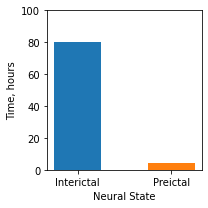

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(3,3))
ax.bar('Interictal', 80, width=0.5)
ax.bar('Preictal', 4, width=0.5)
ax.set_xlabel('Neural State')
ax.set_ylabel('Time, hours')
ax.set_ylim([0,100])

fig.tight_layout()
fig.savefig('figures/class_distribution.png')

## Data Visualisation

Visualise 1 second of EEG data from both classes.

### Preictal

Preictal data segments are provided covering one hour prior to seizure with a five minute seizure horizon (i.e. from 1:05 to 0:05 before seizure onset).

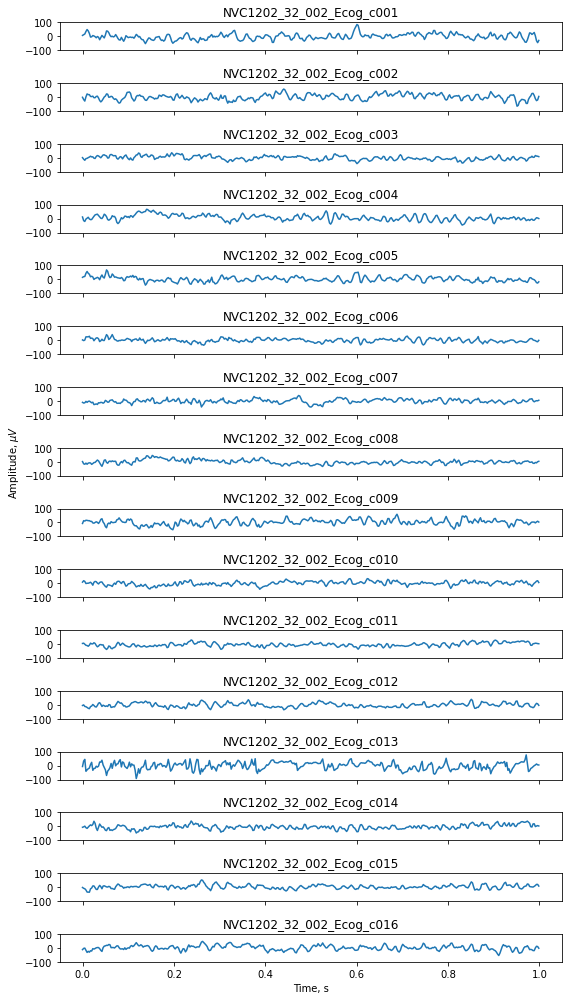

In [20]:
import numpy as np

filename = "Dog_1_preictal_segment_0001.mat"
path = rootdir + filename
mat = sio.loadmat(path)

data = p.get_data(mat)
channels = p.get_channels(mat)
sampling_frequency = p.get_sampling_frequency(mat)

t = np.arange(0, np.rint(sampling_frequency).astype(int)) / sampling_frequency

horizontal_size = 8
vertical_size = 14
fig, axes = plt.subplots(figsize=(horizontal_size, vertical_size), nrows=16, ncols=1, sharex=True)
for i, ax in enumerate(axes):
    ax.plot(t, data[i,0:np.rint(sampling_frequency).astype(int)].T)
    ax.set_ylim([-100, 100])
    ax.title.set_text(channels[i].item())
plt.xlabel('Time, s')
axes[7].set_ylabel('Amplitude, $\mu V$')
# fig.suptitle('Dog_1_preictal_segment_0001')
fig.tight_layout()
fig.savefig('figures/Dog_1_preictal_segment_0001_1s.png')

### Interictal

One hour sequences of interictal ten minute data segments are provided. The interictal data were chosen randomly from the full data record, with the restriction that interictal segments be as far from any seizure as can be practically achieved, to avoid contamination with preictal or postictal signals. In the long duration canine recordings it was possible to maintain a restriction of one week before or after a seizure.

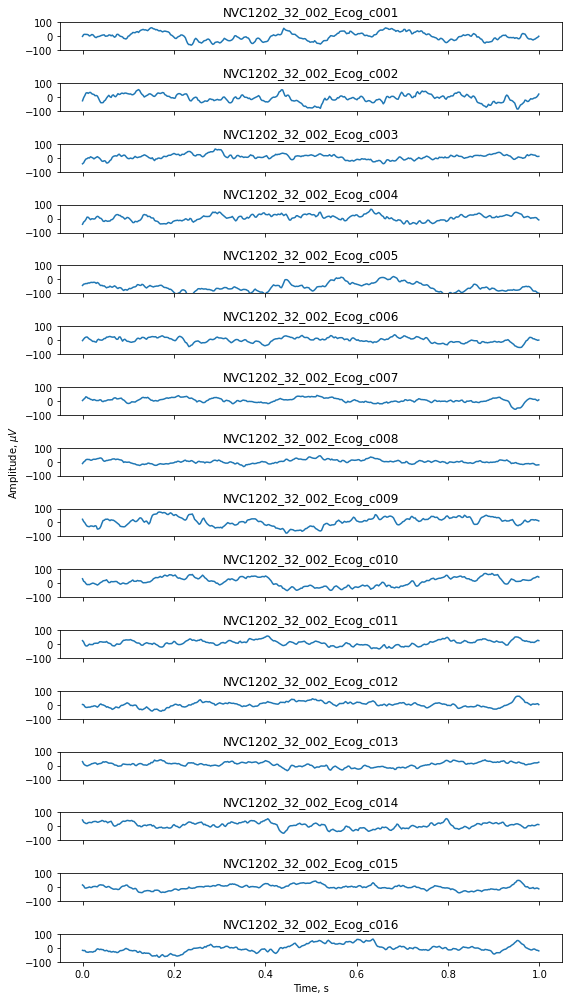

In [21]:
filename = "Dog_1_interictal_segment_0001.mat"
path = rootdir + filename
mat = sio.loadmat(path)

data = p.get_data(mat)

sampling_frequency = p.get_sampling_frequency(mat)
t = np.arange(0, np.rint(sampling_frequency).astype(int)) / sampling_frequency
channels = p.get_channels(mat)
horizontal_size = 8
vertical_size = 14
fig, axes = plt.subplots(figsize=(horizontal_size, vertical_size), nrows=16, ncols=1, sharex=True)
for i, ax in enumerate(axes):
    ax.plot(t, data[i,0:np.rint(sampling_frequency).astype(int)].T)
    ax.set_ylim([-100, 100])
    ax.title.set_text(channels[i].item())
plt.xlabel('Time, s')
axes[7].set_ylabel('Amplitude, $\mu V$')
# fig.suptitle('Dog_1_interictal_segment_0001')
fig.tight_layout()
fig.savefig('figures/Dog_1_interictal_segment_0001.png')